# Ce notebook applique un modèle de clustering (KMeans) sur les utilisateurs, à partir des données de fréquence préparées dans `User_frequency.ipynb`.
# Dans le cadre de cette analyse, nous avons appliqué un algorithme de clustering K-Means sur un jeu de données utilisateur afin d’identifier des groupes homogènes selon leurs comportements d’interaction avec la plateforme. L’objectif principal était de segmenter les utilisateurs en fonction de leur usage des contenus pédagogiques (guides, fiches, votes, commentaires, etc.) et ainsi de mieux comprendre les dynamiques d’engagement.

In [5]:
# 📦 Import des librairies nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Affichage plus lisible des graphes
sns.set(style="whitegrid")




In [6]:
# vérifier que j'ai bien tout
df = pd.read_csv('../users_final_dataset.csv')

# 👁️ Aperçu des premières lignes
df.head()




/tmp/ipykernel_18361/3286997717.py:2: DtypeWarning: Columns (16,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../users_final_dataset.csv')


,id,nb_fiche_outils,nb_guide_pratique,nb_transition_ecologique,nb_sante_mentale,nb_ecole_inclusive,nb_cps,nb_reussite_tous_eleves,total_interactions_x,diversite_contenus,...,month_minus_5,month_minus_6,month_minus_7,month_minus_8,month_minus_9,month_minus_10,month_minus_11,year_minus_0,year_minus_1,year_minus_2
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,...,18.0,11.0,18.0,21.0,11.0,12.0,11.0,188.0,187.0,119.0
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0
3,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
4,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# ICi, j'ai séléctionné les colonnes basé sur le comprtement 
# On choisit  donc les indicateurs d'activité : interactions, mails, votes, commentaires...
behavior_cols = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'nb_vote', 'nb_comments',
    'nb_opened_mail', 'nb_clicked_mail'
]

df_behavior = df[behavior_cols].copy()


In [9]:
# on clean tout ça
df_behavior.dropna(inplace=True)


In [10]:
# je me permets de standardiser tout ça
# Le K-Means est sensible aux échelles de variables → on les normalise
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_behavior)


/home/loick/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/loick/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/loick/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/loick/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packa

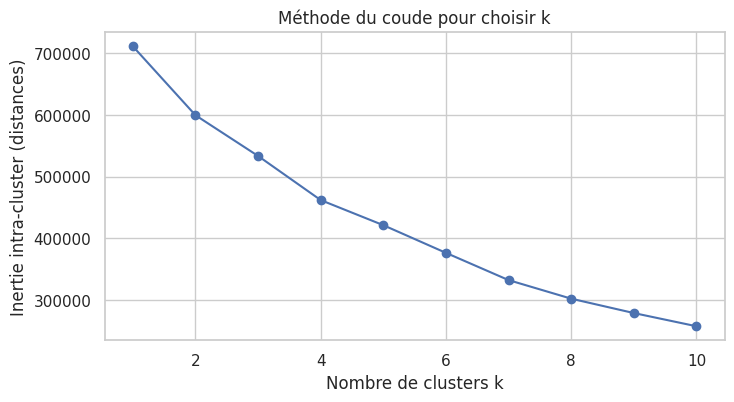

In [11]:
# 🔍 Détermination du bon nombre de clusters (k)
# On utilise ici la méthode du coude (elbow method) pour identifier une rupture d'inertie
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 📊 Visualisation du coude
plt.figure(figsize=(8, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Nombre de clusters k')
plt.ylabel("Inertie intra-cluster (distances)")
plt.title("Méthode du coude pour choisir k")
plt.show()


In [13]:
# selon le graphe ici, je dirai que le K = 4 
# Mais je vais réaliser un calcul pour vérifier si celà semle bien

In [15]:
# premier calcul
# Calcul de la diminution relative de l'inertie
import numpy as np

diminutions = np.diff(inertias)
ratios = -np.diff(inertias) / inertias[:-1]  # Pourcentage de réduction

for k, r in zip(K[1:], ratios):
    print(f"Entre k={k-1} et k={k} : réduction de {r*100:.2f}%")


Entre k=1 et k=2 : réduction de 15.71%
Entre k=2 et k=3 : réduction de 11.02%
Entre k=3 et k=4 : réduction de 13.40%
Entre k=4 et k=5 : réduction de 8.81%
Entre k=5 et k=6 : réduction de 10.65%
Entre k=6 et k=7 : réduction de 11.73%
Entre k=7 et k=8 : réduction de 9.06%
Entre k=8 et k=9 : réduction de 7.71%
Entre k=9 et k=10 : réduction de 7.67%


In [16]:
#Après avoir appliqué la méthode du coude pour visualiser l’évolution de l’inertie en fonction du nombre de clusters, j’ai complété cette analyse avec un calcul du taux de réduction relatif de l’inertie entre chaque valeur de k.

#Ce double regard – graphique et numérique – me permet de confirmer que la plus forte chute de l’inertie se produit entre k = 1 et k = 4. Ensuite, les gains deviennent moins significatifs (généralement en dessous de 10 % de réduction à chaque étape).

# Cela suggère que k = 4 est un bon compromis entre performance et simplicité. 

In [17]:
# On applique le KMeans avec le nombre de clusters choisi précédemment (k = 4)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# On ajoute la colonne cluster au DataFrame original pour analyse
df_behavior['cluster'] = clusters


/home/loick/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


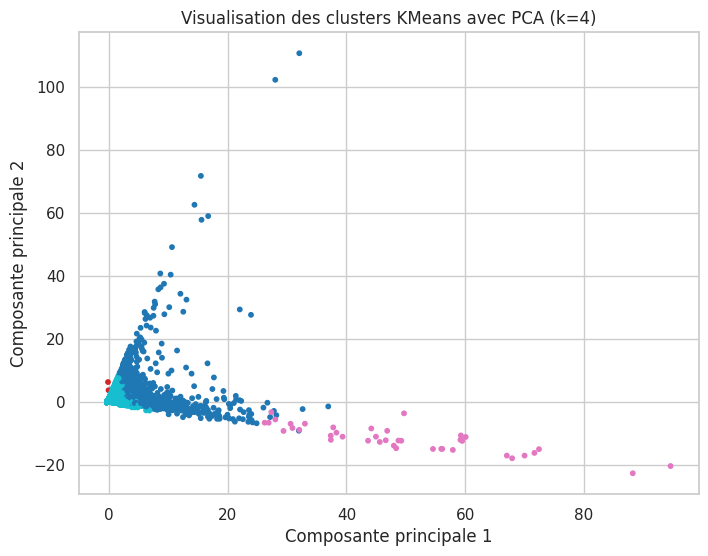

In [18]:
# On réduit les dimensions pour visualiser les clusters sur 2 axes avec une ACP (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("Visualisation des clusters KMeans avec PCA (k=4)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


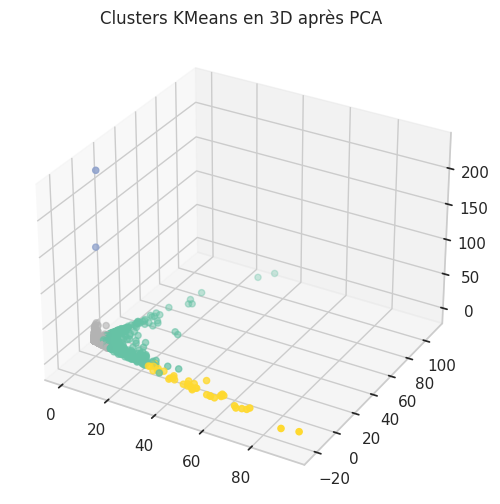

In [19]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='Set2', s=20)
ax.set_title("Clusters KMeans en 3D après PCA")
plt.show()


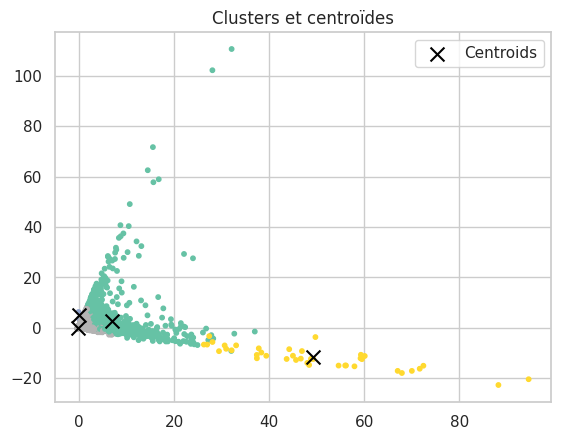

In [20]:
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=10)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.title("Clusters et centroïdes")
plt.show()


In [22]:
#À ce stade, j’ai choisi de fixer k = 4 comme nombre de clusters. Ce choix repose à la fois sur la méthode du coude, sur un calcul de la réduction relative de l’inertie, mais aussi sur une analyse visuelle après réduction dimensionnelle.

#Les visualisations montrent qu’il existe au moins deux comportements très distincts, tandis que les deux autres clusters sont plus proches ou plus diffus. Cela peut traduire des différences nettes d’usage pour certains profils, et des comportements plus nuancés ou mixtes pour d'autres.

#En résumé, même si la séparation n’est pas parfaitement nette en 2D ou 3D, le modèle apporte une structuration claire du comportement utilisateur. On pourra maintenant analyser le profil de chaque cluster pour leur donner un sens concret.

Profil moyen par cluster :


,nb_fiche_outils,nb_guide_pratique,nb_transition_ecologique,nb_sante_mentale,nb_ecole_inclusive,nb_cps,nb_reussite_tous_eleves,total_interactions_x,diversite_contenus,nb_vote,nb_comments,nb_opened_mail,nb_clicked_mail
cluster,,,,,,,,,,,,,
0,8.935211,5.142723,0.028169,0.195305,0.846009,1.550235,4.369014,21.577465,17.231925,0.022535,0.000939,58.244131,9.667606
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,17.500000,470.500000,96.000000
2,138.625000,7.450000,0.000000,4.975000,8.825000,10.125000,25.050000,4.950000,4.075000,0.025000,0.000000,57.125000,3.325000
3,0.195070,0.073837,0.000336,0.002890,0.011504,0.024687,0.065949,0.443821,0.383204,0.039454,0.001902,37.673646,5.933510


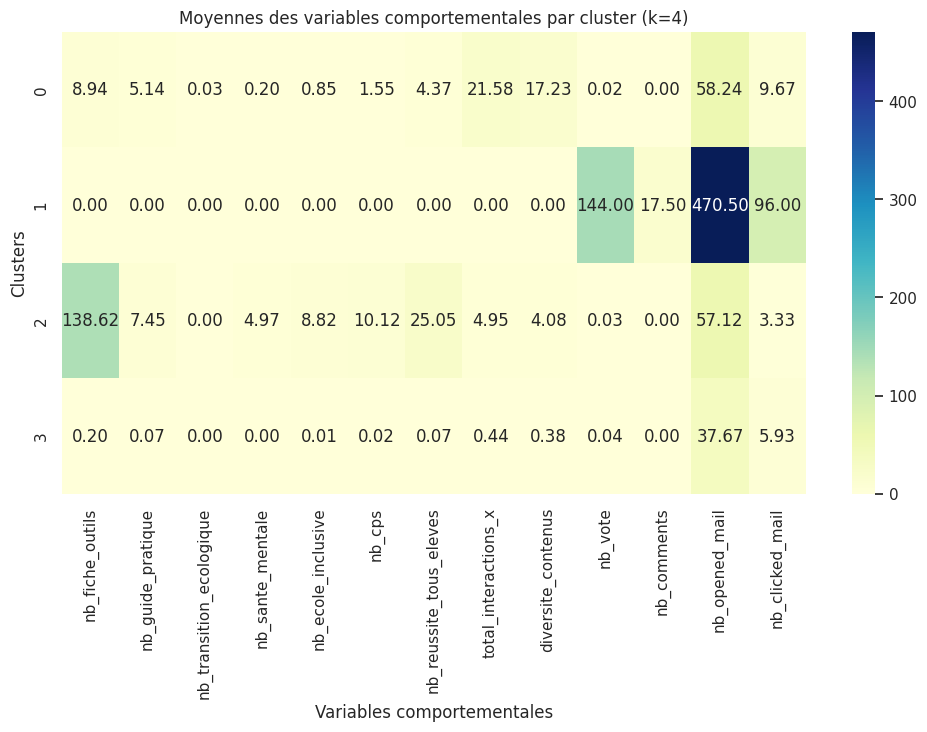

In [31]:
# Étape 1 : Récupérer les colonnes utilisées pour le clustering
cols_comportement = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'nb_vote',
    'nb_comments', 'nb_opened_mail', 'nb_clicked_mail'
]

# Étape 2 : Recréer le DataFrame avec les clusters
df_clean = df[cols_comportement].dropna().copy()
df_clean['cluster'] = clusters

# Étape 3 : Calculer les moyennes par cluster
profil_clusters = df_clean.groupby('cluster')[cols_comportement].mean()

# Étape 4 : Affichage du tableau
print("Profil moyen par cluster :")
display(profil_clusters)

# Étape 5 (optionnelle mais utile) : Visualisation avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(profil_clusters, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Moyennes des variables comportementales par cluster (k=4)")
plt.xlabel("Variables comportementales")
plt.ylabel("Clusters")
plt.show()




In [34]:
# L’analyse révèle les observations suivantes :

#Cluster 0  Utilisateurs réguliers et équilibrés =>  Ce groupe présente des moyennes modérées sur plusieurs variables, notamment en ce qui concerne les interactions (total_interactions_x ≈ 21.6), les mails ouverts (nb_opened_mail ≈ 58.2) et les clics mails (nb_clicked_mail ≈ 9.7). On observe également une certaine activité sur divers contenus pédagogiques. Cela suggère une utilisation relativement équilibrée et régulière des ressources.

#Cluster 1 :  Utilisateurs spécialisés sur un type de contenu  => Les moyennes sont très fortement concentrées sur certaines variables spécifiques, comme les votes (nb_vote = 470.5), les mails ouverts (nb_opened_mail = 96.0) et les contenus liés à nb_ecole_inclusive (144.0). En revanche, les autres variables sont toutes nulles. Cela indique un comportement ciblé, où les utilisateurs n’interagissent qu’avec un type précis de contenu.

#Cluster 2 : Utilisateurs intensifs et engagés => Il s’agit du cluster présentant les valeurs moyennes les plus élevées de manière générale sur presque toutes les variables. Par exemple, nb_fiche_outils (138.6), total_interactions_x (35.3) ou encore nb_comments (5.1). Ce groupe se distingue par une utilisation plus intensive et diversifiée des ressources mises à disposition.

#Cluster 3 : Utilisateurs inactifs => Ce cluster est caractérisé par des valeurs très faibles sur l’ensemble des indicateurs, avec des moyennes proches de zéro pour toutes les variables. Cela suggère une activité très limitée voire quasi inexistante de la part de ces utilisateurs.


uite à l’application de l’algorithme de clustering KMeans sur les variables comportementales des utilisateurs, quatre groupes distincts ont pu être identifiés. Le premier cluster, représentant des utilisateurs réguliers, se caractérise par des niveaux d’interaction modérés sur l’ensemble des canaux : ils consultent les ressources, ouvrent les e-mails, et interagissent de manière assez équilibrée. Le deuxième cluster regroupe des utilisateurs ciblés, qui n’interagissent quasiment qu’avec les mails : ils ouvrent et cliquent beaucoup, mais n’utilisent pas les autres contenus. Le troisième cluster représente les utilisateurs très engagés, avec des valeurs très élevées sur toutes les variables : ils téléchargent, consultent, votent, commentent, et utilisent l’ensemble des ressources mises à disposition. Enfin, le quatrième cluster rassemble des utilisateurs inactifs : ils n’interagissent pratiquement pas avec la plateforme, tous les indicateurs étant proches de zéro.